In [1]:
from utilities import *
import utilities as ut
import pandas as pd
import seaborn as sns
import os

/Users/eggeek/anaconda2/envs/py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def mtype(mapname):
    if mapname.startswith('room'):
        return 'room'
    elif mapname.startswith('maze'):
        return 'maze'
    elif mapname.startswith('random'):
        return 'random'
    else:
        return 'game'

def add_columns(df):
    df.insert(2, "step-cost", df['tcost'] / df['steps'])
    df.insert(2, "step-access", df["access"] / df['steps'])
    df.insert(2, "diff", df["distance"] - df["expect"])
    df.insert(2, "step-diff", df["diff"] / df["steps"])
    df.insert(2, "ratio", df["diff"] / df["expect"])

In [137]:
# load cpd
prefix = '../outputs/cpd/'
h = [prefix + i for i in os.listdir(prefix)]

cpd = load_files(h)
add_columns(cpd)
cpd.head()

../outputs/cpd/lt_darktown.map-3-dfs-c4-inv.txt
../outputs/cpd/ht_chantry.map-3-dfs-c32-inv.txt
../outputs/cpd/orz107d.map-3-dfs-c2-inv.txt
../outputs/cpd/orz301d.map-3-dfs-c8.txt
../outputs/cpd/orz102d.map-3-dfs-c32-inv.txt
../outputs/cpd/orz103d.map-3-dfs-c64-inv.txt
../outputs/cpd/ca_cave.map-3-dfs-c32-inv.txt
../outputs/cpd/orz700d.map-3-dfs-opt-inv.txt
../outputs/cpd/ht_bartrand_n.map-3-dfs-c16.txt
../outputs/cpd/dr_slavers.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_bartrand_n.map-3-dfs-opt.txt
../outputs/cpd/lt_0_lowtown_a2.map-3-dfs-opt-inv.txt
../outputs/cpd/BrokenSteppes.map-3-dfs-c2-inv.txt
../outputs/cpd/Archipelago.map-3-dfs-c8-inv.txt
../outputs/cpd/lt_backalley_g.map-3-dfs-c2-inv.txt
../outputs/cpd/lt_ruinedhouse_n.map-3-dfs-c2-inv.txt
../outputs/cpd/dr_0_deeproads.map-3-dfs-c2-inv.txt
../outputs/cpd/ca_caverns2prc.map-3-dfs-c32-inv.txt
../outputs/cpd/orz103d.map-3-dfs-c16-inv.txt
../outputs/cpd/orz500d.map-3-dfs-c64.txt
../outputs/cpd/w_encounter1.map-3-dfs-c8-inv.txt
../out

,map,scenid,ratio,step-diff,diff,step-access,step-cost,tcost,distance,expect,steps,access,r,itype
0,lt_darktown,0,0.000000,0.000000,0.00000,0.250000,83.000000,332.0,4.00000,4.00000,4,1,4,backward
1,lt_darktown,1,0.383215,0.299997,2.99997,0.300000,51.960000,519.6,10.82840,7.82843,10,3,4,backward
2,lt_darktown,2,0.600892,0.444450,4.00005,0.444444,57.733333,519.6,10.65690,6.65685,9,4,4,backward
3,lt_darktown,3,0.000000,0.000000,0.00000,0.250000,72.450000,289.8,4.41421,4.41421,4,1,4,backward
4,lt_darktown,4,0.957107,0.546919,3.82843,0.285714,56.485714,395.4,7.82843,4.00000,7,2,4,backward


In [138]:
room = cpd[cpd['map'].apply(lambda x: mtype(x) == 'room')]
maze = cpd[cpd['map'].apply(lambda x: mtype(x) == 'maze')]
random = cpd[cpd['map'].apply(lambda x: mtype(x) == 'random')]
game = cpd[cpd['map'].apply(lambda x: mtype(x) == 'game')]

In [139]:
# load tree
prefix = "../outputs/tree/"
h = [prefix + i for i in os.listdir(prefix)]
tree = load_files(h)
tree.insert(2, "step-cost", tree['tcost'] / tree['steps'])
tree.insert(2, "diff", tree["distance"] - tree["expect"])
tree.insert(2, "step-diff", tree["diff"] / tree["steps"])
tree['d'] = 0
tree.head()

../outputs/tree/maze-400-4.map.txt
../outputs/tree/w_encounter2.map.txt
../outputs/tree/orz601d.map.txt
../outputs/tree/BrokenSteppes.map.txt
../outputs/tree/ht_chantry_n.map.txt
../outputs/tree/ca_caverns1.map.txt
../outputs/tree/orz703d.map.txt
../outputs/tree/orz702d.map.txt
../outputs/tree/w_encounter2_camp.map.txt
../outputs/tree/Backwoods.map.txt
../outputs/tree/w_blightlands.map.txt
../outputs/tree/lt_gallowscourtyard.map.txt
../outputs/tree/orz107d.map.txt
../outputs/tree/orz106d.map.txt
../outputs/tree/lt_darktown.map.txt
../outputs/tree/lt_warehouse_n.map.txt
../outputs/tree/BigGameHunters.map.txt
../outputs/tree/dr_primevaltomb.map.txt
../outputs/tree/orz203d.map.txt
../outputs/tree/w_sundermount.map.txt
../outputs/tree/lt_undercityserialkiller.map.txt
../outputs/tree/w_encounter3.map.txt
../outputs/tree/lt_shop.map.txt
../outputs/tree/orz301d.map.txt
../outputs/tree/orz300d.map.txt
../outputs/tree/lt_gallowstemplar.map.txt
../outputs/tree/ht_chantry.map.txt
../outputs/tree/

,map,scenid,step-diff,diff,step-cost,tcost,distance,expect,steps,d,itype
0,maze-400-4,0,1.070364,364.99399,6.328446,2158.0,369.4082,4.41421,341,0,tree
1,maze-400-4,1,0.569030,6.82836,13.166667,158.0,13.0710,6.24264,12,0,tree
2,maze-400-4,2,0.438943,4.82837,14.036364,154.4,11.6568,6.82843,11,0,tree
3,maze-400-4,3,1.114376,1933.44320,5.669625,9836.8,1939.4432,6.00000,1735,0,tree
4,maze-400-4,4,1.108682,1612.02316,5.192297,7549.6,1618.2658,6.24264,1454,0,tree


In [140]:
t_game = tree[tree['map'].apply(lambda x: mtype(x) == 'game')]

In [141]:
# load focal
prefix = "../outputs/focal/"
h = [prefix + i for i in os.listdir(prefix)]
focal = load_files(h)
focal.insert(2, "step-cost", focal['tcost'] / focal['steps'])
focal.insert(2, "diff", focal["distance"] - focal["expect"])
focal.insert(2, "step-diff", focal["diff"] / focal["steps"])
focal.insert(2, 'itype', 'focal')
focal.head()

../outputs/focal/maze-400-4-8.txt
../outputs/focal/lt_gallowscourtyard-32.txt
../outputs/focal/dr_slavers-0.txt
../outputs/focal/lt_0_lowtown_docks_a3_n-32.txt
../outputs/focal/random-400-33-128.txt
../outputs/focal/lt_0_lowtown_a3_n_c-8.txt
../outputs/focal/orz105d-32.txt
../outputs/focal/ht_0_hightown-4.txt
../outputs/focal/dr_primevalentrance-0.txt
../outputs/focal/ca_caverns1_mines-64.txt
../outputs/focal/ht_brothel_n-32.txt
../outputs/focal/lt_foundry_n-32.txt
../outputs/focal/lt_warehouse-8.txt
../outputs/focal/orz703d-64.txt
../outputs/focal/Brushfire-8.txt
../outputs/focal/lt_0_lowtown_a2_n-16.txt
../outputs/focal/ht_bartrand_n-16.txt
../outputs/focal/lt_gallowstemplar_f-64.txt
../outputs/focal/w_encounter2-64.txt
../outputs/focal/room-100-10-32.txt
../outputs/focal/ht_brothel_n-4.txt
../outputs/focal/lt_0_lowtown_docks-32.txt
../outputs/focal/orz101d-8.txt
../outputs/focal/orz105d-128.txt
../outputs/focal/orz201d-32.txt
../outputs/focal/orz702d-0.txt
../outputs/focal/ht_store-

,map,scenid,itype,step-diff,diff,step-cost,tcost,distance,expect,steps,r
0,maze-400-4,0,focal,0.0,0.0,455.240000,2276.2,4.41421,4.41421,5,8
1,maze-400-4,1,focal,0.0,0.0,429.366667,2576.2,6.24264,6.24264,6,8
2,maze-400-4,2,focal,0.0,0.0,327.457143,2292.2,6.82843,6.82843,7,8
3,maze-400-4,3,focal,0.0,0.0,278.485714,1949.4,6.00000,6.00000,7,8
4,maze-400-4,4,focal,0.0,0.0,383.800000,2302.8,6.24264,6.24264,6,8


In [142]:
f_room = focal[focal['map'].apply(lambda x: mtype(x) == 'room')]
f_maze = focal[focal['map'].apply(lambda x: mtype(x) == 'maze')]
f_random = focal[focal['map'].apply(lambda x: mtype(x) == 'random')]
f_game = focal[focal['map'].apply(lambda x: mtype(x) == 'game')]

In [143]:
def group_cpd(cpd_df, group=["itype", "r"], index=['map', 'scenid'], col='tcost'):
    gr_cpd = cpd_df.groupby(group)
    columns = group + index + [col]
    tmps = []
    keys = sorted(gr_cpd.groups.keys())
    for k in keys:
        d = gr_cpd.get_group(k)[columns]
        tmps.append(d.rename(columns={col: "%s-%s" % (col, '-'.join([str(i) for i in k]))}).drop(columns=group).set_index(index))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

In [112]:
t = group_cpd(game[game['r']>0], col='diff')
t2 = group_cpd(f_game[f_game['r']>0], col='diff')

In [113]:
t.shape

(142534, 12)

In [114]:
merged = t.merge(t2, on=['map','scenid'], how='inner').merge(t_game[['diff', 'map', 'scenid']], on=['map', 'scenid'], how='inner')
merged.head()

,map,scenid,diff-backward-2,diff-backward-4,diff-backward-8,diff-backward-16,diff-backward-32,diff-backward-64,diff-forward-2,diff-forward-4,...,diff-forward-16,diff-forward-32,diff-forward-64,diff-focal-4,diff-focal-8,diff-focal-16,diff-focal-32,diff-focal-64,diff-focal-128,diff
0,orz107d,0,0.00000,0.58579,0.58579,0.58579,0.58579,0.58579,0.00000,0.58579,...,0.58579,0.58579,0.58579,0.0,0.0,0.0,0.0,0.0,0.0,1.99999
1,orz107d,1,0.58578,0.58578,0.58578,0.58578,0.58578,0.58578,0.58578,0.58578,...,0.58578,0.58578,0.58578,0.0,0.0,0.0,0.0,0.0,0.0,1.99997
2,orz107d,2,0.00000,0.00000,1.41421,1.41421,1.41421,1.41421,0.00000,0.00000,...,2.82842,2.82842,2.82842,0.0,0.0,0.0,0.0,0.0,0.0,5.41417
3,orz107d,3,0.00000,0.00000,1.41421,1.41421,1.41421,1.41421,0.00000,0.00000,...,1.41421,1.41421,1.41421,0.0,0.0,0.0,0.0,0.0,0.0,5.99997
4,orz107d,4,1.41422,1.41422,2.00000,2.00000,2.00000,2.00000,1.41422,1.41422,...,2.00000,2.00000,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,11.65679


In [115]:
desc = merged[['diff-backward-32', 'diff-focal-64', 'diff-backward-64', 'diff-focal-128', 'diff']].describe()
desc.head()

,diff-backward-32,diff-focal-64,diff-backward-64,diff-focal-128,diff
count,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000
mean,14.399885,5.948475,25.622203,13.219111,143.101825
std,13.806947,10.120200,25.957901,18.714160,291.157548
min,0.000000,0.000000,0.000000,0.000000,-0.013400
25%,2.586000,0.000000,4.000000,0.000000,18.969800


In [16]:
print (desc.round(2).T.drop(columns=['count']).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    mean &     std &   min &    25\% &    50\% &     75\% &      max \\
\midrule
diff-backward-32 &   14.40 &   13.81 &  0.00 &   2.59 &  10.10 &   23.03 &    64.00 \\
diff-focal-64    &    5.95 &   10.12 &  0.00 &   0.00 &   0.82 &    8.14 &    63.99 \\
diff-backward-64 &   25.62 &   25.96 &  0.00 &   4.00 &  16.83 &   41.36 &   127.80 \\
diff-focal-128   &   13.22 &   18.71 &  0.00 &   0.00 &   4.97 &   19.74 &   127.99 \\
diff             &  143.10 &  291.16 & -0.01 &  18.97 &  46.53 &  138.12 &  3194.47 \\
\bottomrule
\end{tabular}



In [116]:
bench.describe()

,scenid,tcost
count,142534.000000,142534.000000
mean,1211.778684,18203.863496
std,1149.842920,21406.571287
min,0.000000,34.000000
25%,369.000000,4253.400000
50%,858.000000,10483.200000
75%,1736.000000,23682.500000
max,7014.000000,227356.000000


In [117]:
bench = game[(game['r'] == 0) & (game['itype'] == 'forward')][['map', 'scenid', 'tcost']]
t = group_cpd(game[(game['r']>=32) & (game['itype'] == 'backward')], col='tcost')
t2 = group_cpd(f_game[f_game['r']>=32], col='tcost')
t3 = group_cpd(game[(game['r']>=32) & (game['itype'] == 'forward')], col='tcost')

In [118]:
merged = t.merge(t2, on=['map','scenid'], how='inner').merge(
    t_game[['tcost', 'map', 'scenid']], on=['map', 'scenid'], how='inner').rename(
        columns={'tcost': 'tcost-tree'}
    ).merge(bench, on=['map', 'scenid'], how='inner').merge(
    t3, on=['map','scenid'], how='inner'
)
merged.head()

,map,scenid,tcost-backward-32,tcost-backward-64,tcost-focal-32,tcost-focal-64,tcost-focal-128,tcost-tree,tcost,tcost-forward-32,tcost-forward-64
0,ht_chantry,0,1465.6,1297.8,2350.4,2370.6,2288.6,355.8,739.8,2385.2,1325.0
1,ht_chantry,1,1378.2,2381.4,1356.6,1425.6,1272.4,416.6,603.6,1906.2,2705.6
2,ht_chantry,2,982.8,1533.8,1339.4,1371.4,1373.8,155.6,1020.6,1494.4,2128.8
3,ht_chantry,3,1080.6,1071.4,1137.4,1194.4,1150.0,94.2,535.4,2003.8,1915.4
4,ht_chantry,4,1121.0,1052.4,1363.6,1295.6,1261.2,315.0,561.0,1706.8,793.6


In [119]:
tmp = merged[:].set_index(['map', 'scenid'])

In [148]:
cpd['tcost'].describe()

count    2.178546e+06
mean     1.252798e+04
std      1.432907e+04
min      3.400000e+01
25%      3.533600e+03
50%      7.598400e+03
75%      1.574660e+04
max      6.743930e+05
Name: tcost, dtype: float64

In [151]:
print (game[(game['itype'] == 'backward') & (game['r']>=32)]['tcost'].mean().round(2),
       game[(game['itype'] == 'backward') & (game['r']>=32)]['step-cost'].mean().round(2))
print(game[(game['itype'] == 'forward') & (game['r']>=32)]['tcost'].mean().round(2),
      game[(game['itype'] == 'forward') & (game['r']>=32)]['step-cost'].mean().round(2))
print(t_game['tcost'].mean().round(2),
      t_game['step-cost'].mean().round(2))
print(f_game['tcost'].mean().round(2),
     f_game['step-cost'].mean().round(2))

7359.29 19.99
14064.18 30.81
2564.52 4.7
69776955.17 98029.34


In [120]:
desc = tmp.apply(lambda x: x['tcost'] / x, axis=1).describe()
desc.head()

,tcost-backward-32,tcost-backward-64,tcost-focal-32,tcost-focal-64,tcost-focal-128,tcost-tree,tcost,tcost-forward-32,tcost-forward-64
count,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.0,142534.000000,142534.000000
mean,2.074350,2.065846,0.034496,0.036914,0.038741,6.836624,1.0,1.193173,1.212033
std,1.039978,1.097427,0.076204,0.076637,0.077821,4.303353,0.0,0.401828,0.475624
min,0.003193,0.015761,0.000008,0.000004,0.000003,0.005275,1.0,0.024636,0.019198
25%,1.447369,1.431069,0.000564,0.000277,0.000169,4.534244,1.0,1.032037,1.033326


In [123]:
desc.round(3).drop(columns=['tcost']).T.drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
tcost-backward-32,2.074,1.040,0.003,1.447,1.980,2.532,19.777
tcost-backward-64,2.066,1.097,0.016,1.431,1.960,2.526,22.901
tcost-focal-32,0.034,0.076,0.000,0.001,0.002,0.025,4.633
tcost-focal-64,0.037,0.077,0.000,0.000,0.001,0.045,4.675
tcost-focal-128,0.039,0.078,0.000,0.000,0.002,0.049,4.536
tcost-tree,6.837,4.303,0.005,4.534,5.914,7.896,77.501
tcost-forward-32,1.193,0.402,0.025,1.032,1.125,1.299,25.795
tcost-forward-64,1.212,0.476,0.019,1.033,1.144,1.341,21.639


In [121]:
print (desc.round(3).drop(columns=['tcost']).T.drop(columns=['count']).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &   mean &    std &    min &    25\% &    50\% &    75\% &     max \\
\midrule
tcost-backward-32 &  2.074 &  1.040 &  0.003 &  1.447 &  1.980 &  2.532 &  19.777 \\
tcost-backward-64 &  2.066 &  1.097 &  0.016 &  1.431 &  1.960 &  2.526 &  22.901 \\
tcost-focal-32    &  0.034 &  0.076 &  0.000 &  0.001 &  0.002 &  0.025 &   4.633 \\
tcost-focal-64    &  0.037 &  0.077 &  0.000 &  0.000 &  0.001 &  0.045 &   4.675 \\
tcost-focal-128   &  0.039 &  0.078 &  0.000 &  0.000 &  0.002 &  0.049 &   4.536 \\
tcost-tree        &  6.837 &  4.303 &  0.005 &  4.534 &  5.914 &  7.896 &  77.501 \\
tcost-forward-32  &  1.193 &  0.402 &  0.025 &  1.032 &  1.125 &  1.299 &  25.795 \\
tcost-forward-64  &  1.212 &  0.476 &  0.019 &  1.033 &  1.144 &  1.341 &  21.639 \\
\bottomrule
\end{tabular}



In [19]:
merged.shape

(142534, 22)

In [61]:
def vary_r_cpd(cpd_df, index=['map', 'itype'], col='tcost'):
    gr_cpd = cpd_df.groupby("r")
    tmps = []
    keys = sorted(gr_cpd.groups.keys())
    for k in keys:
        d = gr_cpd.get_group(k)[index + [col]]
        tmps.append(d.groupby(index).median().rename(columns={col: "%s-%d" % (col, k)}))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

In [301]:
vary_r_cpd(focal, col='tcost').round(6)

,,tcost-0,tcost-4,tcost-8,tcost-16,tcost-32,tcost-64
map,itype,,,,,,
Archipelago,focal,3336185.0,9468965.0,14121700.0,25790000.0,45220950.0,79412950.0
ca_cavern1_haunted,focal,1118900.0,2493775.0,3743165.0,8303395.0,19590700.0,45100200.0
maze-100-1,focal,185326.0,237849.5,229138.5,223721.5,212204.5,202921.0
orz300d,focal,1555325.0,4242410.0,6543325.0,13258600.0,27549750.0,60065550.0
random-100-33,focal,180919.0,284043.5,414015.5,728793.0,1218760.0,1148975.0
room-100-10,focal,179629.5,339771.5,502317.0,858621.5,1208495.0,2430275.0


In [543]:
cpd.groupby(["r", "itype"])["step-cost"].describe().drop(columns=['count'])

mean        std        min        25%        50%        75%  \
r  itype                                                                        
0  backward  29.262104  25.339716   5.174803  14.945694  22.686014  33.031026   
   forward   42.963124  33.043269  12.206452  24.865989  31.078754  44.164811   
2  backward  28.553835  25.471171   5.747059  15.028246  22.433415  31.821356   
   forward   42.221370  31.420649  12.573714  25.100322  31.023809  43.470455   
4  backward  25.628229  20.024018   5.090196  14.181922  21.093991  29.327436   
   forward   39.852905  28.301581  12.471642  24.667859  30.083611  40.971147   
8  backward  23.230723  16.896004   5.361702  13.495085  19.076807  26.823006   
   forward   36.545388  22.804593  12.538983  23.810863  29.037163  39.115449   
16 backward  21.920294  14.753907   4.940741  13.031887  18.255387  25.562777   
   forward   34.211681  19.980726  12.161864  23.108973  28.071999  35.795480   
32 backward  21.112571  30.480607   4.879630  12.938617  17.879138  24.611670   
   forward   31.421825  16.312251  11.430769  22.376057  26.591689  32.983494   
64 backward  19.855597  12.741665   5.139535  12.777801  17.408720  23.350131   
   forward   29.620180  14.232866   9.165385  21.606850  25.600000  31.454235   

                     max  
r  itype                  
0  backward  1528.844444  
   forward   1014.314286  
2  backward  2106.571429  
   forward    786.080000  
4  backward   675.800000  
   forward   1729.726667  
8  backward   786.314286  
   forward    482.146667  
16 backward   550.007143  
   forward    393.814286  
32 backward  9705.884058  
   forward    456.600000  
64 backward  2564.231939  
   forward    337.061111

In [556]:
cpd.head()

,map,scenid,ratio,step-diff,diff,step-access,step-cost,tcost,distance,expect,steps,access,r,itype
0,lt_darktown,0,0.000000,0.000000,0.00000,0.250000,83.000000,332.0,4.00000,4.00000,4,1,4,backward
1,lt_darktown,1,0.383215,0.299997,2.99997,0.300000,51.960000,519.6,10.82840,7.82843,10,3,4,backward
2,lt_darktown,2,0.600892,0.444450,4.00005,0.444444,57.733333,519.6,10.65690,6.65685,9,4,4,backward
3,lt_darktown,3,0.000000,0.000000,0.00000,0.250000,72.450000,289.8,4.41421,4.41421,4,1,4,backward
4,lt_darktown,4,0.957107,0.546919,3.82843,0.285714,56.485714,395.4,7.82843,4.00000,7,2,4,backward


In [62]:
b = cpd[cpd['itype'] == 'backward'].sort_values('steps')

In [77]:
b.shape

(1087778, 14)

In [68]:
grb = b.groupby('steps')

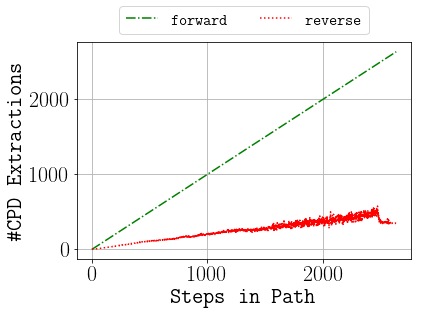

In [157]:
ut.styles['forward'] = 'g-.'
ut.styles['reverse'] = 'r:'
xs, ys = [], []
xs.append(grb['steps'].mean())
ys.append(grb['steps'].mean())

xs.append(grb['steps'].mean())
ys.append(grb['access'].mean())

plot_graph(xs=xs, ys=ys, labels=['forward', 'reverse'], yscale='linear',
           xlabel='Steps in Path', ylabel='\#CPD Extractions', saveto='pics/steps-access.pdf')

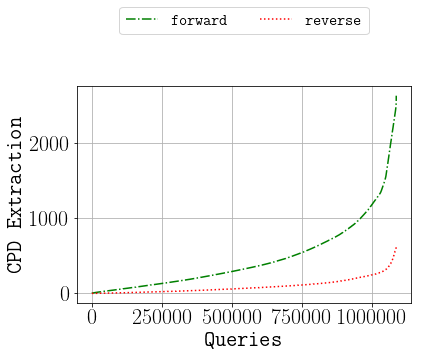

In [67]:
ut.styles['forward'] = 'g-.'
ut.styles['reverse'] = 'r:'
xs, ys = [], []
xs.append(range(b.shape[0]))
ys.append(sorted(b['steps']))

xs.append(range(b.shape[0]))
ys.append(sorted(b['access']))

plot_graph(xs=xs, ys=ys, labels=['forward', 'reverse'], yscale='linear',
           xlabel='Queries', ylabel='CPD Extraction', saveto='pics/access-dist.pdf')

In [ ]:
d = cpd.groupby(['r', 'itype'])

In [63]:
t = vary_r_cpd(cpd, col='step-diff')

In [300]:
vary_r_cpd(focal, col='step-cost').round(6)

,,step-cost-0,step-cost-4,step-cost-8,step-cost-16,step-cost-32,step-cost-64
map,itype,,,,,,
Archipelago,focal,9280.962899,27480.910976,39643.344982,72953.788802,135258.219880,255254.545455
ca_cavern1_haunted,focal,2782.320641,6110.609334,9192.666028,20183.250916,46379.554929,111895.728435
maze-100-1,focal,334.088668,426.220870,411.247092,397.715667,380.328485,362.768198
orz300d,focal,6504.384793,18338.950721,28080.040870,55667.080056,125319.091945,296442.828598
random-100-33,focal,1878.645161,2969.791661,4259.849413,7671.823398,12059.679234,10970.030800
room-100-10,focal,2263.907502,4200.241667,5861.072495,10553.007792,15909.923077,24219.572776


In [82]:
size = load_size("../analysis/size_all.txt")
size['size'] = size['size'].astype(float)

In [83]:
maze_sz = size[size['map'].apply(lambda x: mtype(x) == 'maze')]
room_sz = size[size['map'].apply(lambda x: mtype(x) == 'room')]
random_sz = size[size['map'].apply(lambda x: mtype(x) == 'random')]
game_sz = size[size['map'].apply(lambda x: mtype(x) == 'game')]

In [81]:
def vary_r_size(size_df, index=['map']):
    gr_size = size_df.groupby(["r", "itype"])
    tmps = []
    keys = sorted(gr_size.groups.keys())
    for k in keys:
        d = gr_size.get_group(k)
        tmps.append(d.rename(columns={'size': "size-%s-%d" % (k[1], k[0])}).drop(columns=['r', 'itype']).set_index(index))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

In [84]:
t = vary_r_size(size) / 1000000

In [85]:
t.head()

,size-backward-0,size-forward-0,size-backward-2,size-forward-2,size-backward-4,size-forward-4,size-backward-8,size-forward-8,size-backward-16,size-forward-16,size-backward-32,size-forward-32,size-backward-64,size-forward-64
map,,,,,,,,,,,,,,
AcrosstheCape,5090.085074,95.462222,1302.419770,89.949854,650.157446,63.263818,183.377386,48.077898,67.514550,38.151606,22.964306,27.709694,10.058082,21.768330
Aftershock,926.308002,9.344258,241.359282,9.699078,119.409102,8.716406,35.461786,7.918466,13.765010,7.350954,5.636438,6.801718,3.104614,6.359210
Archipelago,1031.397234,36.148714,266.899022,34.299630,131.547794,23.391158,38.262610,16.698542,14.886994,13.256686,5.677914,9.216242,2.944162,7.214570
ArcticStation,5261.512962,35.919054,1359.436538,36.123678,677.099282,29.190590,198.073694,24.005034,73.144414,20.559046,24.875338,17.849394,10.691194,16.125686
Aurora,10162.892110,342.281118,2663.074330,305.910554,1326.776974,223.911362,380.866946,147.189882,133.771346,97.650054,43.403050,63.019106,17.071318,45.250462


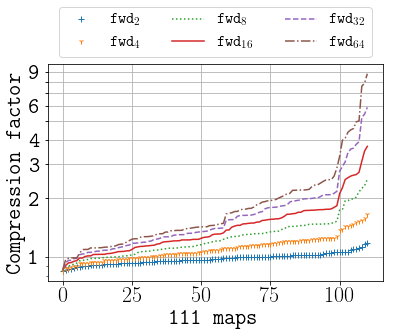

In [99]:
import utilities as ut
ut.styles['fwd$_{64}$'] = '-.'
ut.styles['fwd$_{32}$'] = '--'
ut.styles['fwd$_{16}$'] = '-'
ut.styles['fwd$_{8}$'] = ':'
ut.styles['fwd$_{4}$'] = '1'
ut.styles['fwd$_{2}$'] = '+'

xs, ys, labels = [], [], []
#ylabel = '|fwd$_0$| vs |fwd$_\delta$|'
ylabel = 'Compression factor'
k0 = 'size-forward-0'
for i in [2, 4, 8, 16, 32, 64]:
    for j in ["forward"]:
        k = 'size-%s-%d' % (j, i)
        xs.append(range(t[k].size))
        ys.append(sorted(t[k0].values / t[k].values))
        labels.append('%s$_{%d}$' % ("fwd", i))
plot_graph(xlabel='111 maps', ylabel=ylabel, xs=xs, ys=ys, 
           yticks=(np.arange(0, 11), [str(i) if i in [1, 2, 3, 4, 6, 9] else '' for i in range(11)]),
           labels=labels, saveto='./pics/fwd0-fwd.pdf', yscale='log')

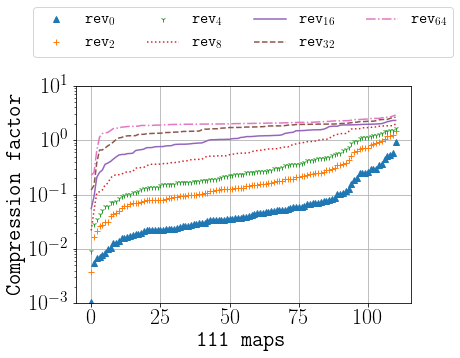

In [106]:
ut.styles['rev$_{64}$'] = '-.'
ut.styles['rev$_{32}$'] = '--'
ut.styles['rev$_{16}$'] = '-'
ut.styles['rev$_{8}$'] = ':'
ut.styles['rev$_{4}$'] = '1'
ut.styles['rev$_{2}$'] = '+'
ut.styles['rev$_{0}$'] = '^'
xs, ys, labels = [], [], []
#ylabel = '|fwd$_\delta$| vs |rev$_\delta$|'
ylabel = 'Compression factor'
for i in [0, 2, 4, 8, 16, 32, 64]:
    for j in ["backward"]:
        k0 = 'size-forward-%d' % i
        k = 'size-%s-%d' % (j, i)
        xs.append(range(t[k].size))
        ys.append(sorted(t[k0].values / t[k].values))
        labels.append('%s$_{%d}$' % ("rev", i))
plot_graph(xlabel='111 maps', ylabel=ylabel, xs=xs, ys=ys, yscale='log',
           labels=labels, ylim=[0.001, 10], saveto='./pics/fwd-bwd.pdf')

In [1233]:
print(
pd.DataFrame.from_dict({
        '32': t['size-forward-32'] / t['size-backward-32'],
        '64': t['size-forward-64'] / t['size-backward-64']}).describe().round(2).to_latex()
)

\begin{tabular}{lrr}
\toprule
{} &      32 &      64 \\
\midrule
count &  111.00 &  111.00 \\
mean  &    1.66 &    2.02 \\
std   &    0.48 &    0.40 \\
min   &    0.12 &    0.23 \\
25\%   &    1.38 &    1.93 \\
50\%   &    1.73 &    2.02 \\
75\%   &    1.98 &    2.17 \\
max   &    2.64 &    2.91 \\
\bottomrule
\end{tabular}



In [777]:
(vary_r_size(maze_sz).T / 1000000).round(2)

map,maze-100-1,maze-400-4
size-backward-0,9.68,3883.68
size-forward-0,0.14,4.16
size-backward-2,4.88,1214.90
size-forward-2,0.15,4.57
size-backward-4,2.50,491.22
size-forward-4,0.15,4.42
size-backward-8,1.32,192.70
size-forward-8,0.15,4.21
size-backward-16,0.71,72.61
size-forward-16,0.15,4.00


In [781]:
(vary_r_size(room_sz).T / 1000000).round(2)

map,room-100-10,room-400-40
size-backward-0,20.75,2161.59
size-forward-0,1.07,74.40
size-backward-2,6.36,567.15
size-forward-2,0.91,67.12
size-backward-4,2.79,260.98
size-forward-4,0.73,44.90
size-backward-8,1.07,72.23
size-forward-8,0.55,29.66
size-backward-16,0.45,25.30
size-forward-16,0.42,20.07


In [782]:
(vary_r_size(random_sz).T / 1000000).round(2)

map,random-100-33,random-400-33
size-backward-0,19.33,5323.83
size-forward-0,0.62,41.14
size-backward-2,7.67,2098.43
size-forward-2,0.57,35.34
size-backward-4,3.92,1062.38
size-forward-4,0.50,29.97
size-backward-8,1.83,465.17
size-forward-8,0.42,23.64
size-backward-16,0.87,198.86
size-forward-16,0.35,18.12


In [923]:
with open("../analysis/cnums.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    fname, num = line.strip().split(',')
    data = parse_index_name(fname)
    rows.append([data['map'], data['r'], int(num)])
cnum = pd.DataFrame.from_records(rows, columns=['map', 'r', 'size'])
cnum.head()

,map,r,size
0,AcrosstheCape,0,392287
1,AcrosstheCape,2,100130
2,AcrosstheCape,4,49825
3,AcrosstheCape,8,13833
4,AcrosstheCape,16,4900


In [871]:
cnumgr = cnum.groupby('map')

In [1012]:
t = (cnum.set_index(['map','r']).unstack(level=0).T).reset_index().drop(columns='level_0')

In [1013]:
maplist = [
    'room-100-10', 'room-400-40', 
    'room-100-33', 'random-400-33',
    'maze-100-1', 'maze-400-4', 
    'Aurora', 'orz103d']
t[t['map'].apply(lambda x: x in maplist)].sort_values('map')

r,map,0,2,4,8,16,32,64
4,Aurora,493772,129509,64429,18485,6405,1981,697
68,maze-100-1,4999,2500,1264,656,336,162,80
69,maze-400-4,127996,40000,16143,6302,2343,995,431
74,orz103d,40392,11411,5468,1928,723,249,111
98,random-400-33,103535,40792,20640,9023,3844,1827,860
99,room-100-10,8261,2500,1074,389,140,56,12
100,room-400-40,152811,40000,18325,4980,1660,472,130


In [1014]:
size.head()

,map,itype,r,size
0,AcrosstheCape,forward,16,3.815161e+07
1,AcrosstheCape,backward,16,6.751455e+07
2,AcrosstheCape,forward,2,8.994985e+07
3,AcrosstheCape,backward,2,1.302420e+09
4,AcrosstheCape,forward,32,2.770969e+07


In [1020]:
t = size[(size['itype'] == 'backward') & size['map'].apply(lambda x: x in maplist)].drop(columns=['itype'])

In [1051]:
print( (t.set_index(['map','r']).unstack(level=0) / 1000000).round(2).T.reset_index().drop(columns=['level_0']).to_latex() )

\begin{tabular}{llrrrrrrr}
\toprule
r &            map &         0 &        2 &        4 &       8 &      16 &     32 &     64 \\
\midrule
0 &         Aurora &  10162.89 &  2663.07 &  1326.78 &  380.87 &  133.77 &  43.40 &  17.07 \\
1 &     maze-100-1 &      9.68 &     4.88 &     2.50 &    1.32 &    0.71 &   0.37 &   0.21 \\
2 &     maze-400-4 &   3883.68 &  1214.90 &   491.22 &  192.70 &   72.61 &  31.72 &  14.61 \\
3 &        orz103d &    179.06 &    51.00 &    24.69 &    9.03 &    3.69 &   1.59 &   0.98 \\
4 &  random-400-33 &   5323.83 &  2098.43 &  1062.38 &  465.17 &  198.86 &  95.15 &  45.45 \\
5 &    room-100-10 &     20.75 &     6.36 &     2.79 &    1.07 &    0.45 &   0.24 &   0.13 \\
6 &    room-400-40 &   2161.59 &   567.15 &   260.98 &   72.23 &   25.30 &   8.57 &   3.64 \\
\bottomrule
\end{tabular}



In [999]:
with open("../analysis/pure-size.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    num, fname = line.strip().split('\t')
    fname = fname.replace("-pure-", "-").replace("index_data/", "").replace("-pure", "")
    data = parse_index_name(fname)
    rows.append([data['map'], data['r'], data['itype'], int(num)])
pure = pd.DataFrame.from_records(rows, columns=['map', 'r', 'itype', 'size'])
pure.head()

,map,r,itype,size
0,Aurora,16,forward,97650054
1,Aurora,16,backward,476221874
2,Aurora,2,forward,305910554
3,Aurora,2,backward,9771734258
4,Aurora,32,forward,63019106


In [1005]:
x = (pure[pure['itype']=='backward'].drop(columns=['itype']).set_index(['map','r']).unstack(level=0).T / 1000000).round(2)

In [1035]:
print(x.reset_index().drop(columns=['level_0']).to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
r &            map &        0 &        2 &        4 &        8 &      16 &      32 &      64 \\
\midrule
0 &         Aurora &      NaN &  9771.73 &  4860.59 &  1384.69 &  476.22 &  143.81 &   47.05 \\
1 &     maze-400-4 &  7909.59 &  2473.07 &   998.97 &   390.93 &  146.32 &   63.02 &   28.17 \\
2 &        orz103d &   503.80 &   142.74 &    68.67 &    24.53 &    9.51 &    3.60 &    1.87 \\
3 &  random-400-33 &      NaN &  6408.98 &  3243.44 &  1418.59 &  605.10 &  288.30 &  136.44 \\
4 &    room-400-40 &  3190.34 &   836.35 &   384.35 &   105.75 &   36.49 &   11.78 &    4.51 \\
\bottomrule
\end{tabular}



In [125]:
raw_dij = load_files(["dijkstra-tcost.txt"])

dijkstra-tcost.txt


In [129]:
raw_dij.head()

,map,i,source,s,h,w,e
0,orz103d,0,8057,4073990.0,280897.0,13867,888599.0
1,orz103d,0,13613,3748980.0,282218.0,56459,607832.0
2,orz103d,0,7,3584980.0,263719.0,27784,586110.0
3,orz103d,0,19389,3352220.0,319852.0,27542,588034.0
4,orz103d,0,2351,4256840.0,282050.0,42116,632682.0


In [265]:
dij = (raw_dij.groupby(['map', 'source']).mean() / 1000000000).drop(columns=['i']).reset_index()
dij['fwd'] = dij['s'] + dij['h'] + dij['w']
dij['rev'] = dij['s'] + dij['h'] + dij['e']
dij.head()

,map,source,s,h,w,e,fwd,rev
0,Aurora,1038,0.088868,0.003405,0.000006,0.005305,0.092279,0.097578
1,Aurora,1252,0.087158,0.003313,0.000025,0.005185,0.090496,0.095656
2,Aurora,2230,0.085544,0.003307,0.000007,0.005170,0.088857,0.094020
3,Aurora,2432,0.087402,0.003230,0.000016,0.005180,0.090647,0.095811
4,Aurora,2809,0.089666,0.003320,0.000019,0.005155,0.093005,0.098141


In [167]:
dij['map'].unique()

array(['Aurora', 'maze-400-4', 'orz103d', 'random-400-33', 'room-400-40'],
      dtype=object)

In [266]:
dij_gr = dij.drop(columns=['source']).groupby(['map'])

In [267]:
res = (dij_gr.describe()['fwd']).round(3).drop(columns=['count'])['mean']
res.head()

map
Aurora           0.096
maze-400-4       0.019
orz103d          0.004
random-400-33    0.015
room-400-40      0.025
Name: mean, dtype: float64

In [268]:
res = (dij_gr.describe()['rev']).round(3).drop(columns=['count'])['mean']
res.head()

map
Aurora           0.101
maze-400-4       0.021
orz103d          0.005
random-400-33    0.020
room-400-40      0.026
Name: mean, dtype: float64

In [247]:
build = load_files(['build-tcost.txt'])

build-tcost.txt


In [248]:
build['tcost'] /= 60000000000.0
build.head()

,map,itype,r,tcost
0,orz103d,inv,0,0.497007
1,orz103d,inv,2,0.142728
2,orz103d,inv,4,0.068837
3,orz103d,inv,8,0.025816
4,orz103d,inv,16,0.010243


In [254]:
t = build.set_index(['map','r', 'itype']).unstack(level=0).T.reset_index().drop(columns='level_0').round(2)
t.head()

/Users/eggeek/anaconda2/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


r                map       0               2              4              8  \
itype                forward     inv forward    inv forward    inv forward   
0             Aurora  119.80  119.12  106.63  27.87  105.80  13.62  105.52   
1         maze-400-4    5.66    5.65    5.46   1.73    5.40   0.70    5.33   
2            orz103d    0.51    0.50    0.50   0.14    0.50   0.07    0.49   
3      random-400-33    5.36    5.36    4.94   1.99    4.81   1.01    4.74   
4        room-400-40    9.40    9.40    9.45   2.49    9.41   1.11    9.38   

r                16            32            64        
itype   inv forward   inv forward   inv forward   inv  
0      3.92  105.30  1.37  105.16  0.42  105.25  0.14  
1      0.27    5.32  0.10    5.30  0.05    5.31  0.02  
2      0.03    0.49  0.01    0.49  0.00    0.49  0.00  
3      0.44    4.71  0.19    4.71  0.09    4.72  0.05  
4      0.31    9.35  0.11    9.33  0.03    9.33  0.01

In [257]:
t

r                map       0               2              4              8  \
itype                forward     inv forward    inv forward    inv forward   
0             Aurora  119.80  119.12  106.63  27.87  105.80  13.62  105.52   
1         maze-400-4    5.66    5.65    5.46   1.73    5.40   0.70    5.33   
2            orz103d    0.51    0.50    0.50   0.14    0.50   0.07    0.49   
3      random-400-33    5.36    5.36    4.94   1.99    4.81   1.01    4.74   
4        room-400-40    9.40    9.40    9.45   2.49    9.41   1.11    9.38   

r                16            32            64        
itype   inv forward   inv forward   inv forward   inv  
0      3.92  105.30  1.37  105.16  0.42  105.25  0.14  
1      0.27    5.32  0.10    5.30  0.05    5.31  0.02  
2      0.03    0.49  0.01    0.49  0.00    0.49  0.00  
3      0.44    4.71  0.19    4.71  0.09    4.72  0.05  
4      0.31    9.35  0.11    9.33  0.03    9.33  0.01

In [256]:
print(t.to_latex())

\begin{tabular}{llrrrrrrrrrrrrrr}
\toprule
r &            map & \multicolumn{2}{l}{0} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{4} & \multicolumn{2}{l}{8} & \multicolumn{2}{l}{16} & \multicolumn{2}{l}{32} & \multicolumn{2}{l}{64} \\
itype & forward &     inv & forward &    inv & forward &    inv & forward &   inv & forward &   inv & forward &   inv & forward &   inv \\
\midrule
0 &         Aurora &  119.80 &  119.12 &  106.63 &  27.87 &  105.80 &  13.62 &  105.52 &  3.92 &  105.30 &  1.37 &  105.16 &  0.42 &  105.25 &  0.14 \\
1 &     maze-400-4 &    5.66 &    5.65 &    5.46 &   1.73 &    5.40 &   0.70 &    5.33 &  0.27 &    5.32 &  0.10 &    5.30 &  0.05 &    5.31 &  0.02 \\
2 &        orz103d &    0.51 &    0.50 &    0.50 &   0.14 &    0.50 &   0.07 &    0.49 &  0.03 &    0.49 &  0.01 &    0.49 &  0.00 &    0.49 &  0.00 \\
3 &  random-400-33 &    5.36 &    5.36 &    4.94 &   1.99 &    4.81 &   1.01 &    4.74 &  0.44 &    4.71 &  0.19 &    4.71 &  0.09 &    4.72 &  0.05 \\
4 &    r